# PRÁCTICA 6: MACHINE LEARNING

## Ejercicio 2: visualización de los datos

In [1]:
#!pip install skl2onnx
#!pip install onnx2json
import Utils as utils
import numpy as np
import pandas

In [2]:
stats = pandas.read_csv('datos/FinalKart.csv')

In [3]:
display(stats)

,ray1,ray2,ray3,ray4,ray5,kartx,karty,kartz,time,action
0,-1.0,6.521043,4.611090,6.489725,4.588912,15.98893,0.275615,3.105009,0.373333,NONE
1,-1.0,6.520910,4.611073,6.489857,4.588929,15.98893,0.275709,3.105008,0.429229,NONE
2,-1.0,6.520908,4.611071,6.489859,4.588931,15.98893,0.275723,3.105008,0.447533,NONE
3,-1.0,6.520905,4.611069,6.489862,4.588933,15.98893,0.275733,3.105008,0.465616,NONE
4,-1.0,6.520902,4.611067,6.489865,4.588934,15.98893,0.275744,3.105008,0.517280,NONE
...,...,...,...,...,...,...,...,...,...,...
526,-1.0,0.784666,0.555139,-1.000000,8.644862,20.04486,0.275744,32.260820,26.806450,NONE
527,-1.0,0.784666,0.555139,-1.000000,8.644862,20.04486,0.275744,32.260820,26.904730,NONE
528,-1.0,0.784666,0.555139,-1.000000,8.644862,20.04486,0.275744,32.260820,27.001380,NONE
529,-1.0,0.784666,0.555139,-1.000000,8.644862,20.04486,0.275744,32.260820,27.105750,NONE


In [4]:
#accede a una matriz de numpy y elimina la ultima columna
output = stats[['action']]
stats = stats.drop(['action'], axis=1)

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [6]:
#Coger los datos del dataframe
df1 = pandas.DataFrame(stats, columns=stats.columns)

#Crear el escalador y ajustarlo a mis datos
scaling = StandardScaler()
scaling.fit(df1)

#Escalo los datos con el método transform y los guardo en Scaled data
Scaled_data=scaling.transform(df1)

#Configuro el pca para decirle a cuantos vectores quiero que reduzca mis datos
principal=PCA(n_components=3)
#Ajusto el pca a mis datos
principal.fit(Scaled_data)
x = principal.transform(Scaled_data)#mis datos almacenados en 3 vectores

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

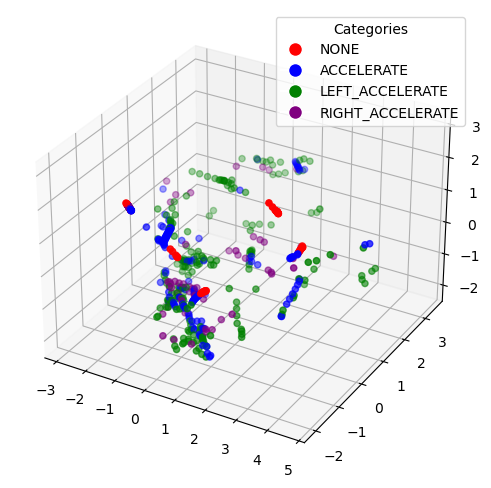

In [8]:
# Crear un diccionario de colores para cada categoría
color_dict = {'NONE': 'red', 'ACCELERATE': 'blue', 'LEFT_ACCELERATE': 'green', 'RIGHT_ACCELERATE': 'purple'}

# Mapear las categorías a colores utilizando map
colors = output['action'].map(color_dict)

# Crear un gráfico 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Colorear los puntos según las categorías
scatter = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=colors)

# Crear elementos de leyenda manualmente
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label)
                   for label, color in color_dict.items()]

# Añadir la leyenda al gráfico
ax.legend(handles=legend_elements, title='Categories', loc='upper right')

# Mostrar el gráfico
#plt.show()

## Ejercicio 3: Limpieza del dataset 

In [9]:
## Quito las columnas de tiempo (no lo necesito porque tengo las posiciones, no es relevante)
#Quito también la columna de posiciones y, porque la pista es plana y nunca cambia la posición en este eje
stats = stats.drop('karty', axis = 1)
stats = stats.drop('time', axis = 1)

In [10]:
stats

,ray1,ray2,ray3,ray4,ray5,kartx,kartz
0,-1.0,6.521043,4.611090,6.489725,4.588912,15.98893,3.105009
1,-1.0,6.520910,4.611073,6.489857,4.588929,15.98893,3.105008
2,-1.0,6.520908,4.611071,6.489859,4.588931,15.98893,3.105008
3,-1.0,6.520905,4.611069,6.489862,4.588933,15.98893,3.105008
4,-1.0,6.520902,4.611067,6.489865,4.588934,15.98893,3.105008
...,...,...,...,...,...,...,...
526,-1.0,0.784666,0.555139,-1.000000,8.644862,20.04486,32.260820
527,-1.0,0.784666,0.555139,-1.000000,8.644862,20.04486,32.260820
528,-1.0,0.784666,0.555139,-1.000000,8.644862,20.04486,32.260820
529,-1.0,0.784666,0.555139,-1.000000,8.644862,20.04486,32.260820


In [11]:
#sustituyo los valores negativos de los raycast por sus valores máximos para que no contaminen las funciones
max_ray1=stats['ray1'].max()
max_ray2=stats['ray2'].max()
max_ray3=stats['ray3'].max()
max_ray4=stats['ray4'].max()
max_ray5=stats['ray5'].max()

stats.loc[stats['ray1']<=-1,'ray1']=max_ray1
stats.loc[stats['ray2']<=-1,'ray2']=max_ray2
stats.loc[stats['ray3']<=-1,'ray3']=max_ray3
stats.loc[stats['ray4']<=-1,'ray4']=max_ray4
stats.loc[stats['ray5']<=-1,'ray5']=max_ray5
display(stats)

,ray1,ray2,ray3,ray4,ray5,kartx,kartz
0,9.84371,6.521043,4.611090,6.489725,4.588912,15.98893,3.105009
1,9.84371,6.520910,4.611073,6.489857,4.588929,15.98893,3.105008
2,9.84371,6.520908,4.611071,6.489859,4.588931,15.98893,3.105008
3,9.84371,6.520905,4.611069,6.489862,4.588933,15.98893,3.105008
4,9.84371,6.520902,4.611067,6.489865,4.588934,15.98893,3.105008
...,...,...,...,...,...,...,...
526,9.84371,0.784666,0.555139,9.903706,8.644862,20.04486,32.260820
527,9.84371,0.784666,0.555139,9.903706,8.644862,20.04486,32.260820
528,9.84371,0.784666,0.555139,9.903706,8.644862,20.04486,32.260820
529,9.84371,0.784666,0.555139,9.903706,8.644862,20.04486,32.260820


In [12]:
#normalizar los datos de la entrada
#print(stats.describe())
normalize_data = stats.columns
values= stats[normalize_data]

# Inicializar el StandardScaler
scaler = StandardScaler()

# Ajustar el scaler y transformar las características
normalized_features = scaler.fit_transform(values)

# Reemplazar las características originales con las normalizadas en el DataFrame
stats[normalize_data] = normalized_features
display(stats)


,ray1,ray2,ray3,ray4,ray5,kartx,kartz
0,0.146571,0.221239,0.170410,-0.290526,-0.336635,0.837668,-0.191416
1,0.146571,0.221186,0.170401,-0.290463,-0.336627,0.837668,-0.191416
2,0.146571,0.221185,0.170400,-0.290463,-0.336626,0.837668,-0.191416
3,0.146571,0.221184,0.170399,-0.290461,-0.336625,0.837668,-0.191416
4,0.146571,0.221183,0.170398,-0.290460,-0.336624,0.837668,-0.191416
...,...,...,...,...,...,...,...
526,0.146571,-2.069541,-1.969564,1.316956,1.660955,0.997212,0.751154
527,0.146571,-2.069541,-1.969564,1.316956,1.660955,0.997212,0.751154
528,0.146571,-2.069541,-1.969564,1.316956,1.660955,0.997212,0.751154
529,0.146571,-2.069541,-1.969564,1.316956,1.660955,0.997212,0.751154


In [13]:
#One hot encoding de pandas para convertir las variables cualitativas de la salida
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output = False)
output_encoded = onehot_encoder.fit_transform(output)

output_encoded = pandas.DataFrame(output_encoded,columns=onehot_encoder.get_feature_names_out(['action']))
complete_stats = pandas.concat([stats,output_encoded] , axis = 1)

display(complete_stats)
display(output_encoded)

,ray1,ray2,ray3,ray4,ray5,kartx,kartz,action_ACCELERATE,action_LEFT_ACCELERATE,action_NONE,action_RIGHT_ACCELERATE
0,0.146571,0.221239,0.170410,-0.290526,-0.336635,0.837668,-0.191416,0.0,0.0,1.0,0.0
1,0.146571,0.221186,0.170401,-0.290463,-0.336627,0.837668,-0.191416,0.0,0.0,1.0,0.0
2,0.146571,0.221185,0.170400,-0.290463,-0.336626,0.837668,-0.191416,0.0,0.0,1.0,0.0
3,0.146571,0.221184,0.170399,-0.290461,-0.336625,0.837668,-0.191416,0.0,0.0,1.0,0.0
4,0.146571,0.221183,0.170398,-0.290460,-0.336624,0.837668,-0.191416,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
526,0.146571,-2.069541,-1.969564,1.316956,1.660955,0.997212,0.751154,0.0,0.0,1.0,0.0
527,0.146571,-2.069541,-1.969564,1.316956,1.660955,0.997212,0.751154,0.0,0.0,1.0,0.0
528,0.146571,-2.069541,-1.969564,1.316956,1.660955,0.997212,0.751154,0.0,0.0,1.0,0.0
529,0.146571,-2.069541,-1.969564,1.316956,1.660955,0.997212,0.751154,0.0,0.0,1.0,0.0


,action_ACCELERATE,action_LEFT_ACCELERATE,action_NONE,action_RIGHT_ACCELERATE
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
526,0.0,0.0,1.0,0.0
527,0.0,0.0,1.0,0.0
528,0.0,0.0,1.0,0.0
529,0.0,0.0,1.0,0.0


## Ejercicio 4: Pruebas con diferentes modelos de Machine Learning

In [14]:
import ann #Mi perceptrón multicapa

In [15]:
#import mi_red

In [16]:
nNeuronas_capa = [7, 10, 5, 4]

#thetas = mi_red.initThetas(nNeuronas_capa)
trained_thetas2 = ann.gradientdescent_generalizado(nNeuronas_capa, stats, output_encoded, 0.2, 10000, 1)
#trained_thetas =mi_red.backpropagation(stats, output_encoded, nNeuronas_capa, thetas)



Tamaño sigmoid:  (531, 5)
2  shape:  (531, 5)
Tamaño sigmoid:  (531, 10)
1  shape:  (531, 10)
longitud deltas:  3
dimgradients0:  (5, 6)
dimgradientsA:  (10, 11)
0  dim:  (10, 7)
dimgradients2:  (10, 11)


ValueError: operands could not be broadcast together with shapes (10,10) (10,7) (10,10) 

### Comparación de mi modelo con otros

##### MLP Classifier (SKLearn)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
# Modelo de perceptrón multicapa
model = MLPClassifier(hidden_layer_sizes=(4, 5,4, 4), max_iter=10000)
output_array=output['action'].ravel()
# Divide los datos en conjuntos de entrenamiento y prueba (80% para entrenamiento, 20% para prueba)
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(stats, output_array, test_size=0.2, random_state=42)

# Entrena el modelo
model.fit(X_entrenamiento, y_entrenamiento)


In [ ]:
# Realiza predicciones
y_pred = model.predict(X_prueba)

# Evalúa el rendimiento (puedes usar métricas como precisión, recall, etc.)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_prueba, y_pred)
accuracy